##### in this task missing values *should be imputed* with the mean value of the column
##### impute missing values only in columns required for solutions

In [1]:
import numpy as np
import pandas as pd
from statistics import NormalDist as nd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
consider only [price, pages, avg_reviews, n_reviews, language] for this analysis

#### Question 1 - Solution


In [3]:
result = [('Price', 'numerical-continuous'), ('Pages', 'numerical-discrete'),('avg_reviews', 'numerical-continuous'), ('n_reviews', 'numerical-discrete'), ('Language', 'categorical-nominal')]
pd.DataFrame(result,columns=['column','Data type'])

,column,Data type
0,Price,numerical-continuous
1,Pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,Language,categorical-nominal


#### Question 2

compute Pearson's correlation between pages and weight in the data
(you can use the built-in Series.corr() function for that purpose)

#### Question 2 - Solution

In [4]:
### fix missing values
def weight_convert(string):
    if(type(string) == float ): # checking for nan
        return string
    string = string.split()
    if(string[1].lower() == 'pounds'):
        return np.float64(string[0]).round(2) # for pounds
    else:
        return (np.float64(string[0])/16).round(2) # ounces to pounds need divide by 16
    
df['weight (pound)'] = df['weight'].apply(weight_convert)
df['weight (pound)'].fillna(df['weight (pound)'].mean(), inplace=True)
df['pages'].fillna(df['pages'].mean(), inplace=True)
### ------------------
result = df['weight (pound)'].corr(df['pages'])
pd.DataFrame([("Pearson's correlation between pages and weight", result)],columns=["Question","Result"])

,Question,Result
0,Pearson's correlation between pages and weight,0.569506


#### Question 3

show a scatter plot of pages (x) and weight (y)
do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 3 - Solution

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='pages', ylabel='weight (pound)'>

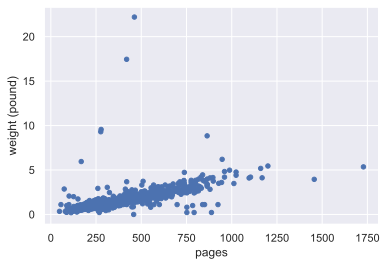

In [5]:
df.plot(kind='scatter',x='pages',y='weight (pound)')

#### Question 4

compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
(you can use the built-in Series.corr() function for that purpose)

#### Question 4 - Solution


In [6]:
## fix data and calculate volume
def volume(dimensions):
    if(type(dimensions) == float ):
        return dimensions
    dimensions = dimensions.split('x',3) # split L x W x H
    length = np.float64(dimensions[0])
    width = np.float64(dimensions[1])
    height = np.float64(dimensions[2].split()[0]) # remove inch from size
    return (length*width*height).round(2)
df['volume (in^3)'] = df['dimensions'].apply(volume) # calculate volume to new col
df['volume (in^3)'].fillna(df['volume (in^3)'].mean(), inplace=True) # fix nan data
df['price'].fillna(df['price'].mean(),inplace=True) # fix nan data
result = df['volume (in^3)'].corr(df['price'])
pd.DataFrame([("Pearson's correlation between volume and price", result)],columns=["Question","Result"])

,Question,Result
0,Pearson's correlation between volume and price,0.418516


#### Question 5

show a scatter plot of a book's volume (inferred by its dimensions) and price
do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 5 - Solution


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volume (in^3)', ylabel='price'>

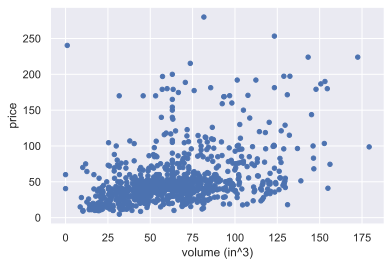

In [7]:
df.plot(kind='scatter',x='volume (in^3)',y='price')

#### Question 6

compute Pearson's correlation between a book's number of pages and the books price
(you can use the built-in Series.corr() function for that purpose)

#### Question 6 - Solution


In [8]:
result = df['pages'].corr(df['price'])
pd.DataFrame([("Pearson's correlation - no. of pages and price", result)],columns=["Question","Result"])

,Question,Result
0,Pearson's correlation - no. of pages and price,0.439074


#### Question 7

show a scatter plot of pages and price

#### Question 6 - Solution

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='pages', ylabel='price'>

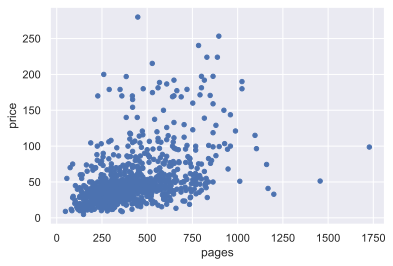

In [9]:
df.plot(kind='scatter',x='pages',y='price')

#### Question 8

sample 10000 values from N~(10, 5)
for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
(recall the NormalDist().cdf() function we used at the lecture)

what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
report both values (calculated and empirical)

#### Question 8 - Solution


In [15]:
mu, sigma, n = 10, 5, 1000 # mean and standard 
low , high = 2.5 , 17.5 # low and high in range
sample = np.random.normal(mu, sigma, n) # take sample
mean,std = sample.mean(), sample.std() # calc mean and std of sample
Zcalc = (low-mu)/sigma
Zempir = (low-mean)/std
calculated = np.float64(1-(nd().cdf(Zcalc)*2))
empirically = np.float64(1-(nd().cdf(Zempir)*2))
calculated = str(calculated.round(4)*100)
empirically = str(empirically.round(4)*100)
pd.DataFrame([('the portion of distribution in range (2.5, 17.5)',calculated + '%',empirically + '%')],columns = ['Question','Answer (calculated)','Answer (empirically)'])

,Question,Answer (calculated),Answer (empirically)
0,"the portion of distribution in range (2.5, 17.5)",86.64%,87.12%


#### Question 9

compute confidence interval of 95% for the true population mean of a book price on Amazon
report left and right boundaries

#### Question 9 - Solution


In [11]:
def confidence_interval(data,alpha):
    mean, std , n = data.mean() , data.std(), len(data)
    z = nd().inv_cdf(1-alpha/2)
    SE = std/(n**0.5) # calc std error
    leftB = mean - z*SE
    rightB = mean + z*SE
    return np.float64(leftB),np.float64(rightB)
book_prices = df['price']
left , right = confidence_interval(book_prices,0.05)
pd.DataFrame([("CI of 95% for book price on Amazon", left.round(3),right.round(3))],columns=["Question","Left boundary","Right boundary"])

,Question,Left boundary,Right boundary
0,CI of 95% for book price on Amazon,49.774,54.433


#### Question 10

can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 54.0] interval?
show your computations, and print your answer: yes or no

#### Question 10 - Solution


In [12]:
left , right = confidence_interval(book_prices,0.15)
if(50.0<=left and right <=54.0):
    answer = 'yes'
else:
    answer = 'no'
pd.DataFrame([("mean of book price in 85% in [50,54] interval?", answer)],columns=["Question","Answer"])

,Question,Answer
0,"mean of book price in 85% in [50,54] interval?",yes
